In [18]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import matplotlib.pyplot as plt



In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1]

0.36862746

In [6]:
#model = Sequential([
#    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
#    Flatten(),
#    Dense(150, activation = 'relu'),
#    Dense(10, activation = 'softmax'),
#])

In [7]:
#Functional API
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [9]:
#loss function and Optimizer
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\Zekul\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
#training the model
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8447 - accuracy: 0.3313
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6653 - accuracy: 0.4024
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5844 - accuracy: 0.4332
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5292 - accuracy: 0.4526
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4905 - accuracy: 0.4716
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4619 - accuracy: 0.4801
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4342 - accuracy: 0.4889
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4102 - accuracy: 0.4959
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3884 - accuracy: 0.5055
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.370

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4647 - accuracy: 0.4875


[1.4646869897842407, 0.48750001192092896]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

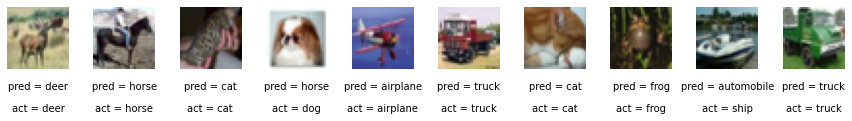

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [14]:
#Better Model (CNN) for image classification
input_layer = Input(shape=(32,32,3))
conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)
conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

In [15]:
flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)
model = Model(input_layer, output_layer)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [19]:
input_layer = Input((32,32,3))
x = Conv2D(filters = 32, kernel_size = 3
, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)
x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

In [23]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5690 - accuracy: 0.4533 - val_loss: 1.1694 - val_accuracy: 0.5806
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1496 - accuracy: 0.5964 - val_loss: 1.1107 - val_accuracy: 0.6037
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9986 - accuracy: 0.6512 - val_loss: 0.9909 - val_accuracy: 0.6509
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9112 - accuracy: 0.6823 - val_loss: 0.9103 - val_accuracy: 0.6830
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8491 - accuracy: 0.7047 - val_loss: 0.9668 - val_accuracy: 0.6645
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7954 - accuracy: 0.7222 - val_loss: 0.8977 - val_accuracy: 0.6932
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7477 - accuracy: 0.7399 - val_loss: 0.8393 -

In [25]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 209ms/step - loss: 0.9338 - accuracy: 0.6885


[0.9338213801383972, 0.6884999871253967]

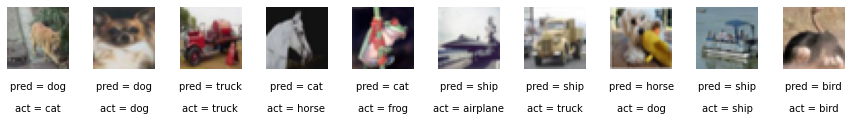

In [33]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

#Summary

As we can see the CNN has an accuracy of 0.6885, which is significantly greater than the first NN we created. 